### Lead Scroing Analysis Case Study
#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 


X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

### Importing the required Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import random
from random import choice

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [4]:
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Imputing null values

In [7]:
(leads.isnull().sum()/len(leads))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
# Check the count of observation before imputing
leads["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
blog                    1
WeLearn                 1
testone                 1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [9]:
leads["Lead Source"].isnull().sum()

36

In [10]:
leads["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [11]:
leads["Lead Source"].mode()

0    Google
dtype: object

In [12]:
leads['Lead Source'].fillna(value = 'Google', inplace=True)#mode value is "Google"

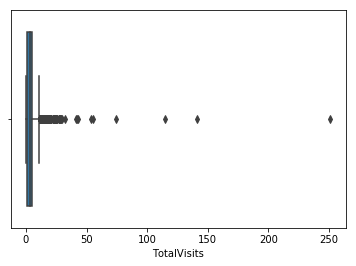

In [13]:
sns.boxplot(leads.TotalVisits)

In [14]:
# Check the count of observation before imputing
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [15]:
leads["TotalVisits"].isnull().sum()

137

In [16]:
leads['TotalVisits'].median()

3.0

In [17]:
leads['TotalVisits'].mode()

0    0.0
dtype: float64

In [18]:
fill_list = [0,2,3,4]

In [19]:
leads['TotalVisits'] = leads['TotalVisits'].fillna(pd.Series(np.random.choice(fill_list, size=len(leads.index))))

In [20]:
leads['TotalVisits'].value_counts()

0.0      2221
2.0      1711
3.0      1343
4.0      1157
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

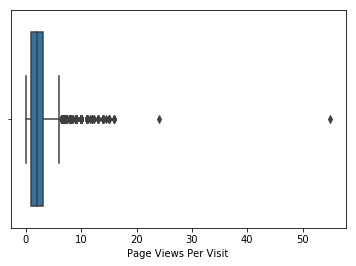

In [21]:
sns.boxplot(leads['Page Views Per Visit'])

In [22]:
leads['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [23]:
leads['Page Views Per Visit'].isnull().sum()

137

In [24]:
leads['Page Views Per Visit'].median()

2.0

In [25]:
leads['Page Views Per Visit'].mode()

0    0.0
dtype: float64

In [26]:
leads['Page Views Per Visit']= leads['Page Views Per Visit'].fillna(pd.Series(np.random.choice(fill_list, size=len(leads.index))))

In [27]:
leads['Page Views Per Visit'].value_counts()

0.00     2225
2.00     1829
3.00     1231
4.00      928
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [28]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [29]:
leads['Last Activity'].isnull().sum()

103

In [30]:
fill_list1 = ['Email Opened', 'SMS Sent', 'Olark Chat Conversation']

In [31]:
leads['Last Activity'] = leads['Last Activity'].fillna(pd.Series(np.random.choice(fill_list1, size=len(leads.index))))

In [32]:
leads['Last Activity'].value_counts()

Email Opened                    3475
SMS Sent                        2777
Olark Chat Conversation         1006
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

## Replacing 'Select' with appropriate values

In [33]:
leads['Lead Profile'].value_counts()#as majority of the values is 'Select', better to keep it as 'Other'

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [34]:
leads['Lead Profile'].isnull().sum()

2709

In [35]:
leads['Lead Profile'].replace('Select','Other',inplace=True)
leads['Lead Profile'].fillna(value='Other',inplace=True)

In [36]:
leads['City'].value_counts()#as majority of the values is 'Select' and 'nan', better to keep it as 'Other'

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [37]:
leads['City'].isnull().sum()

1420

In [38]:
leads['City'].replace('Select','Other Cities',inplace=True)#as majority of the values is 'Select' and 'nan', better to keep it as 'Other'
leads['City'].fillna(value='Other Cities',inplace=True)

In [39]:
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [40]:
leads['Tags'].isnull().sum()

3353

In [41]:
leads['Tags'].fillna(value='Other',inplace=True)

In [42]:
leads['Lead Quality'].isnull().sum()

4767

In [43]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [44]:
print(leads['Lead Quality'].mode())

0    Might be
dtype: object


In [45]:
leads['Lead Quality'].fillna(value='Other',inplace=True)
#though mode is 'Might be', null values are far more higher than mode value, so kept it as 'Other'

In [46]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [47]:
leads['What matters most to you in choosing a course'].isnull().sum()

2709

In [48]:
leads['What matters most to you in choosing a course'].fillna(value='Better Career Prospects',inplace=True)

In [49]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
leads['What is your current occupation'].isnull().sum()

2690

In [51]:
leads['What is your current occupation'].replace('Select','Other',inplace=True)
leads['What is your current occupation'].fillna(value='Other',inplace=True)

In [52]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [53]:
leads['How did you hear about X Education'].isnull().sum()

2207

In [54]:
leads['How did you hear about X Education'].replace('Select','Other',inplace=True)
leads['How did you hear about X Education'].fillna(value='Other',inplace=True)

In [55]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [56]:
leads['Specialization'].isnull().sum()

1438

In [57]:
leads['Specialization'].replace('Select','Other',inplace=True)
leads['Specialization'].fillna(value='Other',inplace=True)

In [58]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Canada                     4
Nigeria                    4
Sweden                     3
Ghana                      2
Philippines                2
Asia/Pacific Region        2
Italy                      2
Bangladesh                 2
Belgium                    2
Netherlands                2
China                      2
Uganda                     2
Sri Lanka                  1
Russia                     1
Indonesia                  1
Vietnam                    1
Denmark                    1
Kenya                      1
Tanzania      

In [59]:
leads['Country'].isnull().sum()

2461

In [60]:
leads['Country'].mode()

0    India
dtype: object

In [61]:
leads['Country'].fillna(value='India',inplace=True)

In [62]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [63]:
leads['Asymmetrique Activity Index'].isnull().sum()

4218

In [64]:
leads['Asymmetrique Activity Index'].replace('02.Medium','Medium', inplace=True)
leads['Asymmetrique Activity Index'].replace('01.High','High', inplace=True)
leads['Asymmetrique Activity Index'].replace('03.Low','Low', inplace=True)

In [65]:
leads['Asymmetrique Activity Index'].fillna(value='Other',inplace=True)

In [66]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [67]:
leads['Asymmetrique Profile Index'].isnull().sum()

4218

In [68]:
leads['Asymmetrique Profile Index'].replace('02.Medium','Medium', inplace=True)
leads['Asymmetrique Profile Index'].replace('01.High','High', inplace=True)
leads['Asymmetrique Profile Index'].replace('03.Low','Low', inplace=True)
leads['Asymmetrique Profile Index'].fillna(value='Other',inplace=True)

In [69]:
leads['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [70]:
leads['Asymmetrique Activity Score'].isnull().sum()

4218

In [71]:
leads['Asymmetrique Activity Score'].fillna(value=0,inplace=True)
#seems like a score is missing as many of the details are missing, hence, 0 would makes sense

In [72]:
leads['Asymmetrique Profile Score'].fillna(value=0,inplace=True)#same as above

In [73]:
(leads.isnull().sum()/len(leads))*100 # checcking for any null values present after imputing

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [74]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other,Other Cities,Medium,Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Other,No,No,Other,Other Cities,Medium,Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other,Mumbai,Medium,High,15.0,18.0,No,No,Modified


# Treating Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x23ab4379080>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab4379940>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab437fef0>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab43651d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab43655f8>],
 'means': []}

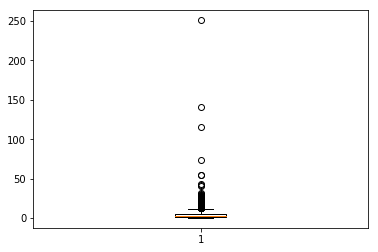

In [75]:
plt.boxplot(leads['TotalVisits'])

In [76]:
Q1 = leads.TotalVisits.quantile(0.05)
Q3 = leads.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads.TotalVisits >= Q1 - 1.5*IQR) & (leads.TotalVisits <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x23ab461e668>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab461ef28>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab461e518>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab46267b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab4626be0>],
 'means': []}

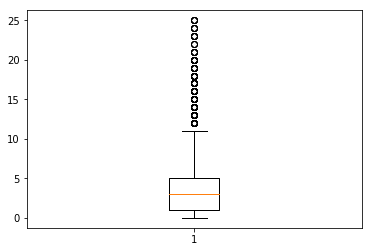

In [77]:
plt.boxplot(leads['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23ab466f710>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab466ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab466f5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab4678860>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab4678c88>],
 'means': []}

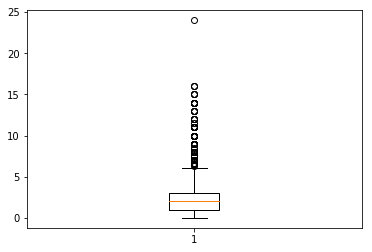

In [78]:
plt.boxplot(leads['Page Views Per Visit'])

In [79]:
Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x23ab46c1470>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab46c1d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab46c1320>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab46c75c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab46c79e8>],
 'means': []}

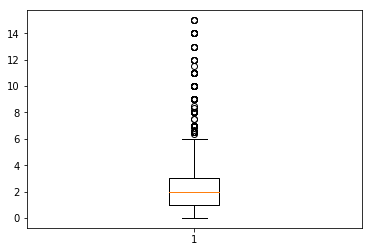

In [80]:
plt.boxplot(leads['Page Views Per Visit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23ab442a0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab442a9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab4422f60>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab4432240>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab4432668>],
 'means': []}

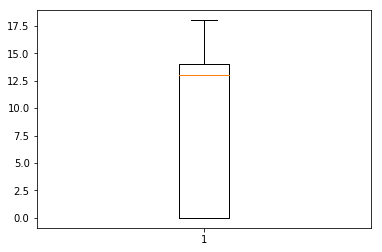

In [81]:
plt.boxplot(leads['Asymmetrique Activity Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23ab4478f28>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab4482828>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab4478dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab448d0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab448d4e0>],
 'means': []}

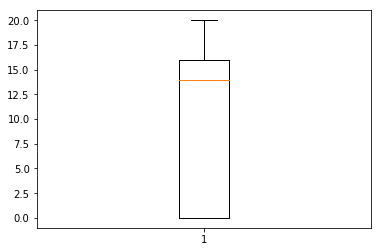

In [82]:
plt.boxplot(leads['Asymmetrique Profile Score'])

In [83]:
leads.shape

(9214, 37)

In [84]:
#prospect id and lead number doesnt affect converted or not
Prospect_ID=leads.pop('Prospect ID')
lead_number = leads['Lead Number']# saving for later use

In [85]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other,Other Cities,Medium,Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Other,No,No,Other,Other Cities,Medium,Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other,Mumbai,Medium,High,15.0,18.0,No,No,Modified


In [86]:
leads.shape

(9214, 36)

In [87]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000
mean,617204.837421,0.385717,3.302800,487.817018,2.341029,7.776210,8.885175
std,23411.519823,0.486791,3.274503,548.297370,2.044747,7.198105,8.250018
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596487.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000
50%,615504.500000,0.000000,3.000000,248.000000,2.000000,13.000000,14.000000
75%,637405.500000,1.000000,5.000000,936.000000,3.000000,14.000000,16.000000
max,660737.000000,1.000000,25.000000,2272.000000,15.000000,18.000000,20.000000


In [88]:
#dropping all single value columns
single_value_columns=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
leads.drop(columns=single_value_columns,inplace=True)

In [89]:
#creating dummies for all the categorical columns at once
to_be_dummied_cols=['Do Not Call','Do Not Email','Lead Origin','Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Search','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity']
leads=pd.get_dummies(data=leads,columns=to_be_dummied_cols,drop_first=True)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Do Not Call_Yes,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Other,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead

#### Checking for Missing Values and Inputing Them

In [90]:
# Adding up the missing values (column-wise)
leads.isnull().sum()

Lead Number                                                                0
Converted                                                                  0
TotalVisits                                                                0
Total Time Spent on Website                                                0
Page Views Per Visit                                                       0
Asymmetrique Activity Score                                                0
Asymmetrique Profile Score                                                 0
Do Not Call_Yes                                                            0
Do Not Email_Yes                                                           0
Lead Origin_Landing Page Submission                                        0
Lead Origin_Lead Add Form                                                  0
Lead Origin_Lead Import                                                    0
Lead Origin_Quick Add Form                                                 0

In [91]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 0 to 9239
Columns: 188 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(3), uint8(181)
memory usage: 2.2 MB


## Test Train Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# Putting feature variable to X
X = leads.drop(['Lead Number','Converted'], axis=1)
X.shape

(9214, 186)

In [94]:
y = leads['Converted']
y.head()
y.shape

(9214,)

In [95]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Sacling

In [96]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Do Not Call_Yes,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Other,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead

In [97]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Do Not Call_Yes,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Other,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead

In [98]:
#Converted percentage is
Converted=(y.sum()/len(leads['Converted'].index))*100
Converted

38.571738658563056

### Creating a logical regression model with all the columns

In [99]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                          169
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2019   Deviance:                          nan
Time:                        11:42:40   Pearson chi2:                 2.90e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -1.257e+15   1.14e+08   -1.1e+07      0.000   -1.26e+15   -1.26e+15
TotalVisits                                                              5.522e+13    1.3e+06   4.25e+07      0.000    5.52e+13    5.52e+13
Total Time Spent on Website                                              3.557e+14   1.02e+06   3.47e+08      0.000    3.56e+14    3.56e+14
Page Views Per Visit                                                    -3.006e+13   1.36e+06   -2.2e+07      0.000   -3.01e+13   -3.01e+13
Asymmetrique Activity Score                                              3.245e+15   1.25e+07   2.59e+08      0.000    3.24e+15    3.24e+15
Asymmetrique Profile Score                                              -4.564e+14    1.4e+07  -3.25e+07      0.000   -4.56e+14   -4.56e+14
Do Not Call_Yes                                                          2.855e+15    4.8e+07   5.95e+07      0.000    2.86e+15    2.86e+15
Do Not Email_Yes                                                        -2.648e+14   4.46e+06  -5.94e+07      0.000   -2.65e+14   -2.65e+14
Lead Origin_Landing Page Submission                                     -1.832e+14   4.14e+06  -4.42e+07      0.000   -1.83e+14   -1.83e+14
Lead Origin_Lead Add Form                                                 2.66e+14   1.39e+07   1.92e+07      0.000    2.66e+14    2.66e+14
Lead Origin_Lead Import                                                 -1.612e+15   7.14e+07  -2.26e+07      0.000   -1.61e+15   -1.61e+15
Lead Origin_Quick Add Form                                                600.1443   4.28e-06    1.4e+08      0.000     600.144     600.144
Lead Source_Direct Traffic                                              -2.537e+15   4.28e+07  -5.92e+07      0.000   -2.54e+15   -2.54e+15
Lead Source_Facebook                                                    -1.147e+15   8.25e+07  -1.39e+07      0.000   -1.15e+15   -1.15e+15
Lead Source_Google                                                      -2.496e+15   4.27e+07  -5.85e+07      0.000    -2.5e+15    -2.5e+15
Lead Source_Live Chat                                                    3.997e+15   7.85e+07   5.09e+07      0.000       4e+15       4e+15
Lead Source_NC_EDM                                                       4.251e+15   8.05e+07   5.28e+07      0.000    4.25e+15    4.25e+15
Lead Source_Olark Chat                                                  -2.224e+15   4.29e+07  -5.19e+07      0.000   -2.22e+15   -2.22e+15
Lead Source_Organic Search                                              -2.468e+15   4.28e+07  -5.76e+07      0.000   -2.47e+15   -2.47e+15
Lead Source_Pay per Click Ads                                           -5.076e+15

In [100]:
logreg = LogisticRegression()

#### Running RFE with 15 variables

In [101]:
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False,

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 81),
 ('Total Time Spent on Website', False, 16),
 ('Page Views Per Visit', False, 101),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 11),
 ('Do Not Call_Yes', False, 109),
 ('Do Not Email_Yes', False, 13),
 ('Lead Origin_Landing Page Submission', False, 62),
 ('Lead Origin_Lead Add Form', False, 20),
 ('Lead Origin_Lead Import', False, 65),
 ('Lead Origin_Quick Add Form', False, 159),
 ('Lead Source_Direct Traffic', False, 78),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 79),
 ('Lead Source_Live Chat', False, 152),
 ('Lead Source_NC_EDM', False, 35),
 ('Lead Source_Olark Chat', False, 28),
 ('Lead Source_Organic Search', False, 80),
 ('Lead Source_Pay per Click Ads', False, 153),
 ('Lead Source_Press_Release', False, 160),
 ('Lead Source_Reference', False, 49),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Social Media', False, 127),
 ('Lead Source_WeLearn', False, 146),
 ('Lead Source_We

In [104]:
col = X_train.columns[rfe.support_]

In [105]:
X_train.columns[rfe.support_]

Index(['Asymmetrique Activity Score', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'What is your current occupation_Other', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Worst', 'Asymmetrique Activity Index_Other', 'Asymmetrique Profile Index_Other', 'Last Notable Activity_Olark Chat Conversation'], dtype='object')

#### Creating a logistic regression model with the variables that support the model

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1301.7
Date:                Mon, 18 Nov 2019   Deviance:                       2603.5
Time:                        11:42:49   Pearson chi2:                 8.86e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -6.9533      0.439    -15.857      0.000      -7.813      -6.094
Asymmetrique Activity Score                       3.6018      0.402      8.956      0.000       2.813       4.390
Lead Source_Welingak Website                      3.3369      1.022      3.265      0.001       1.334       5.340
Last Activity_SMS Sent                            2.3805      0.123     19.288      0.000       2.139       2.622
What is your current occupation_Other            -2.8877      0.144    -20.081      0.000      -3.170      -2.606
Tags_Busy                                         2.5923      0.284      9.136      0.000       2.036       3.148
Tags_Closed by Horizzon                           9.1082      1.024      8.893      0.000       7.101      11.116
Tags_Lost to EINS                                 9.4143      0.651     14.462      0.000       8.138      10.690
Tags_Other                                        3.5972      0.224     16.049      0.000       3.158       4.037
Tags_Ringing                                     -1.1910      0.284     -4.193      0.000      -1.748      -0.634
Tags_Will revert after reading the email          6.3735      0.248     25.706      0.000       5.888       6.859
Tags_switched off                                -1.8666      0.622     -3.003      0.003      -3.085      -0.648
Lead Quality_Worst                               -2.1411      0.642     -3.334      0.001      -3.400      -0.882
Asymmetrique Activity Index_Other                 3.6641      0.411      8.905      0.000       2.858       4.471
Asymmetrique Profile Index_Other                  3.6641      0.411      8.905      0.000       2.858       4.471
Last Notable Activity_Olark Chat Conversation    -1.4619      0.433     -3.378      0.001      -2.310      -0.614
=================================================================================================================
"""

In [107]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2178    0.560329
2924    0.996251
9108    0.065445
7926    0.025599
7870    0.561997
7615    0.006436
2718    0.003912
500     0.065445
8328    0.043126
505     0.953717
dtype: float64

In [108]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.56032912, 0.99625051, 0.06544524, 0.0255991 , 0.56199684,
       0.00643595, 0.00391193, 0.06544524, 0.04312561, 0.95371716])

#### Checking the VIF values of the variables

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Asymmetrique Activity Index_Other,inf
13,Asymmetrique Profile Index_Other,inf
0,Asymmetrique Activity Score,10.430000
7,Tags_Other,7.400000
3,What is your current occupation_Other,4.380000
9,Tags_Will revert after reading the email,3.180000
8,Tags_Ringing,2.010000
2,Last Activity_SMS Sent,1.680000
11,Lead Quality_Worst,1.560000
5,Tags_Closed by Horizzon,1.350000


In [110]:
y_train.head()

2178    0
2924    1
9108    0
7926    0
7870    0
Name: Converted, dtype: int64

In [111]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred*100})
y_train_pred_final['Lead Number'] = leads['Lead Number']
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,56.032912,660737.0
1,1,99.625051,660728.0
2,0,6.544524,660727.0
3,0,2.559910,660719.0
4,0,56.199684,660681.0


In [112]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 80 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,56.032912,660737.0,0
1,1,99.625051,660728.0,1
2,0,6.544524,660727.0,0
3,0,2.559910,660719.0,0
4,0,56.199684,660681.0,0


##### Checking the confision metrics and the accuracy

In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3838   81]
 [ 467 2063]]


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9150255853620717


#### Dropping the column 'Asymmetrique Activity Index_Other' as it had high VIF-value

In [115]:
col = col.drop('Asymmetrique Activity Index_Other', 1)
col

Index(['Asymmetrique Activity Score', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'What is your current occupation_Other', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Worst', 'Asymmetrique Profile Index_Other', 'Last Notable Activity_Olark Chat Conversation'], dtype='object')

Re-running the model after dropping the variable with high VIF-value

In [116]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1301.7
Date:                Mon, 18 Nov 2019   Deviance:                       2603.5
Time:                        11:43:12   Pearson chi2:                 8.86e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -6.9533      0.439    -15.857      0.000      -7.813      -6.094
Asymmetrique Activity Score                       3.6018      0.402      8.956      0.000       2.813       4.390
Lead Source_Welingak Website                      3.3369      1.022      3.265      0.001       1.334       5.340
Last Activity_SMS Sent                            2.3805      0.123     19.288      0.000       2.139       2.622
What is your current occupation_Other            -2.8877      0.144    -20.081      0.000      -3.170      -2.606
Tags_Busy                                         2.5923      0.284      9.136      0.000       2.036       3.148
Tags_Closed by Horizzon                           9.1082      1.024      8.893      0.000       7.101      11.116
Tags_Lost to EINS                                 9.4143      0.651     14.462      0.000       8.138      10.690
Tags_Other                                        3.5972      0.224     16.049      0.000       3.158       4.037
Tags_Ringing                                     -1.1910      0.284     -4.193      0.000      -1.748      -0.634
Tags_Will revert after reading the email          6.3735      0.248     25.706      0.000       5.888       6.859
Tags_switched off                                -1.8666      0.622     -3.003      0.003      -3.085      -0.648
Lead Quality_Worst                               -2.1411      0.642     -3.334      0.001      -3.400      -0.882
Asymmetrique Profile Index_Other                  7.3282      0.823      8.905      0.000       5.715       8.941
Last Notable Activity_Olark Chat Conversation    -1.4619      0.433     -3.378      0.001      -2.310      -0.614
=================================================================================================================
"""

In [117]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [118]:
y_train_pred_final['Converted_Prob'] = y_train_pred*100

In [119]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 80 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,56.032912,660737.0,0
1,1,99.625051,660728.0,1
2,0,6.544524,660727.0,0
3,0,2.559910,660719.0,0
4,0,56.199684,660681.0,0


#### Checking the overall accuracy of the model on the train set

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Asymmetrique Profile Index_Other,18.26
0,Asymmetrique Activity Score,10.43
7,Tags_Other,7.40
3,What is your current occupation_Other,4.38
9,Tags_Will revert after reading the email,3.18
8,Tags_Ringing,2.01
2,Last Activity_SMS Sent,1.68
11,Lead Quality_Worst,1.56
5,Tags_Closed by Horizzon,1.35
4,Tags_Busy,1.20


#### Dropping the column 'Asymmetrique Profile Index_Other' as it had high VIF-value

In [121]:
col = col.drop('Asymmetrique Profile Index_Other', 1)
col

Index(['Asymmetrique Activity Score', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'What is your current occupation_Other', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Worst', 'Last Notable Activity_Olark Chat Conversation'], dtype='object')

In [122]:
#Re-running the model after dropping the variable with high VIF-value
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1343.9
Date:                Mon, 18 Nov 2019   Deviance:                       2687.8
Time:                        11:43:17   Pearson chi2:                 9.44e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.6381      0.197    -18.500      0.000      -4.023      -3.253
Asymmetrique Activity Score                       0.0153      0.052      0.296      0.768      -0.086       0.116
Lead Source_Welingak Website                      3.3110      1.020      3.247      0.001       1.312       5.310
Last Activity_SMS Sent                            2.1871      0.115     18.972      0.000       1.961       2.413
What is your current occupation_Other            -2.7507      0.137    -20.030      0.000      -3.020      -2.482
Tags_Busy                                         2.7377      0.277      9.871      0.000       2.194       3.281
Tags_Closed by Horizzon                           9.1380      1.023      8.932      0.000       7.133      11.143
Tags_Lost to EINS                                 8.9771      0.636     14.110      0.000       7.730      10.224
Tags_Other                                        3.6912      0.220     16.753      0.000       3.259       4.123
Tags_Ringing                                     -1.1169      0.281     -3.973      0.000      -1.668      -0.566
Tags_Will revert after reading the email          6.4087      0.245     26.195      0.000       5.929       6.888
Tags_switched off                                -1.8101      0.619     -2.926      0.003      -3.023      -0.598
Lead Quality_Worst                               -2.0036      0.665     -3.014      0.003      -3.306      -0.701
Last Notable Activity_Olark Chat Conversation    -1.1367      0.442     -2.571      0.010      -2.003      -0.270
=================================================================================================================
"""

In [123]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [124]:
y_train_pred_final['Converted_Prob'] = y_train_pred*100

In [125]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 80 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,37.916824,660737.0,0
1,1,99.586192,660728.0,1
2,0,7.210877,660727.0,0
3,0,6.377434,660719.0,0
4,0,51.709903,660681.0,0


#### Checking the overall accuracy of the model on the train set

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Other,4.71
3,What is your current occupation_Other,4.37
2,Last Activity_SMS Sent,1.67
9,Tags_Will revert after reading the email,1.35
1,Lead Source_Welingak Website,1.12
8,Tags_Ringing,1.09
4,Tags_Busy,1.04
6,Tags_Lost to EINS,1.04
12,Last Notable Activity_Olark Chat Conversation,1.04
10,Tags_switched off,1.03


### Drawing the AUC-ROC Curve

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

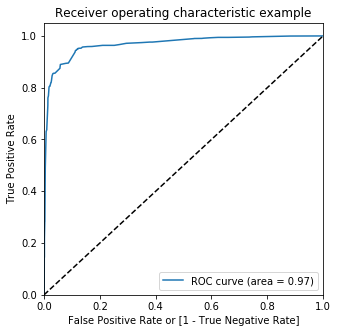

In [129]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Calculating Log Loss

In [130]:
ll=metrics.log_loss(y_train_pred_final.Converted,y_train_pred_final.predicted)
ll

3.0848797605975826

### Calculating mean squared error

In [131]:
mse=metrics.mean_squared_error(y_train_pred_final.Converted,y_train_pred_final.predicted)
mse

0.08931617305008528

## Making Predictions on the test set

### Scaling the numeric variables

In [132]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

#### Taking only those colunmns needed by the model

In [133]:
X_test = X_test[col]
X_test.head()

,Asymmetrique Activity Score,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Olark Chat Conversation
2729,-1.083014,0,1,0,0,0,0,0,0,1,0,0,0
5463,-1.083014,0,0,0,0,0,0,1,0,0,0,0,0
6476,-1.083014,0,0,0,0,0,0,0,1,0,0,0,0
4135,-1.083014,0,0,0,0,0,0,0,0,1,0,0,0
5408,-1.083014,0,1,0,0,0,0,0,0,1,0,0,0


In [134]:
#Adding a constant to X
X_test_sm = sm.add_constant(X_test)

In [135]:
#Predict Y
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2729    0.992904
5463    0.509152
6476    0.008397
4135    0.940143
5408    0.992904
2681    0.992904
2271    0.905305
2659    0.940143
3186    0.902355
8213    0.995982
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred*100)
# Let's see the head
y_pred_1.head()

,0
2729,99.290423
5463,50.915184
6476,0.839663
4135,94.014291
5408,99.290423


In [137]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [138]:
y_test_df.index

Int64Index([2729, 5463, 6476, 4135, 5408, 2681, 2271, 2659, 3186, 8213,
            ...
            3412, 8178, 4673, 4322, 8816, 1051, 8706, 7173, 6151, 3069], dtype='int64', length=2765)

In [139]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [141]:
y_pred_final.head()

,Converted,0
0,1,99.290423
1,0,50.915184
2,0,0.839663
3,1,94.014291
4,1,99.290423


In [142]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [143]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Converted','Converted_Prob'], axis=1)

In [144]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob
0,1,99.290423
1,0,50.915184
2,0,0.839663
3,1,94.014291
4,1,99.290423


In [145]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 80 else 0)

In [146]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,99.290423,1
1,0,50.915184,0
2,0,0.839663,0
3,1,94.014291,1
4,1,99.290423,1


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9157323688969259

In [148]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1717,   24],
       [ 209,  815]], dtype=int64)

Sensitivity is calculated as:   

Sensitivity = No. of actual Yeses correctly predicted / Total number of actual Yeses

In [149]:
Sensitivity = 814 / (210 + 814)
Sensitivity

0.794921875

Specificity is calculated as:   
    
    
Specificity = No. of actual Noes correctly predicted / Total number of actual Noes

In [150]:
Specificity = 1717 / (1717 + 24)
Specificity 

0.9862148190695003